Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Estadísticas descriptivas:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      1

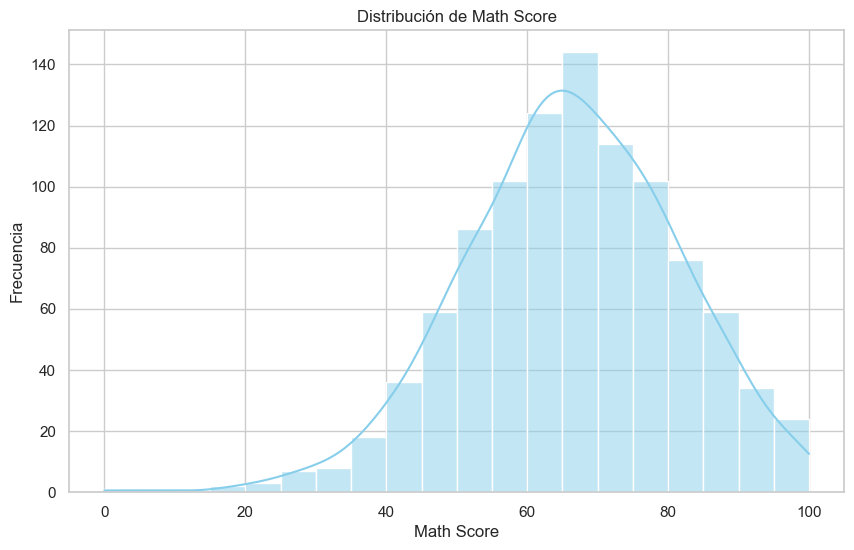

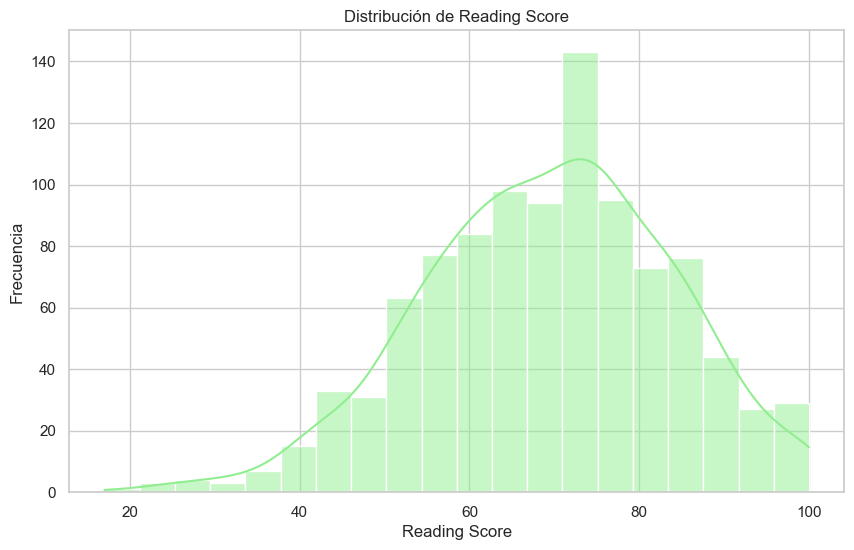

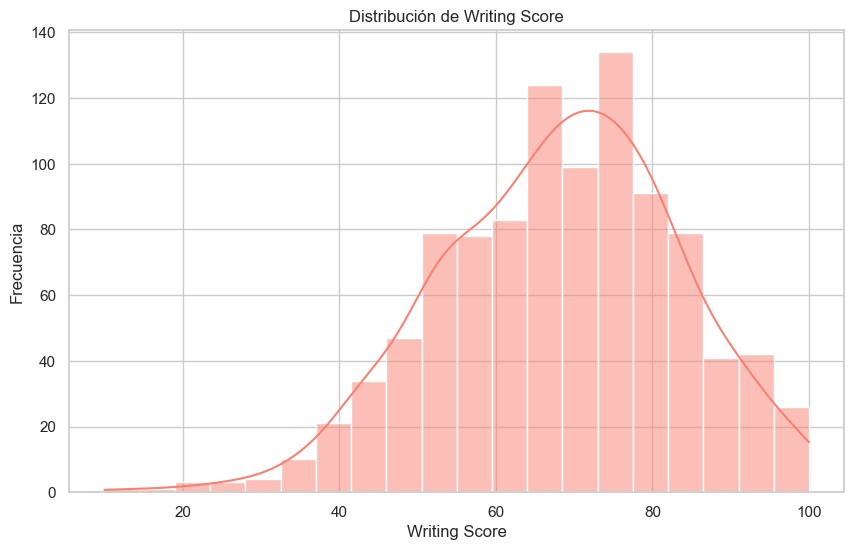

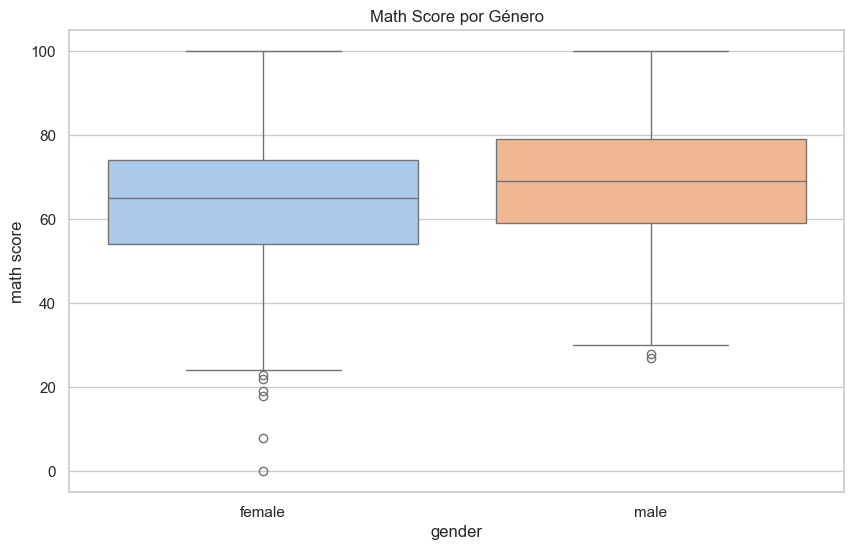

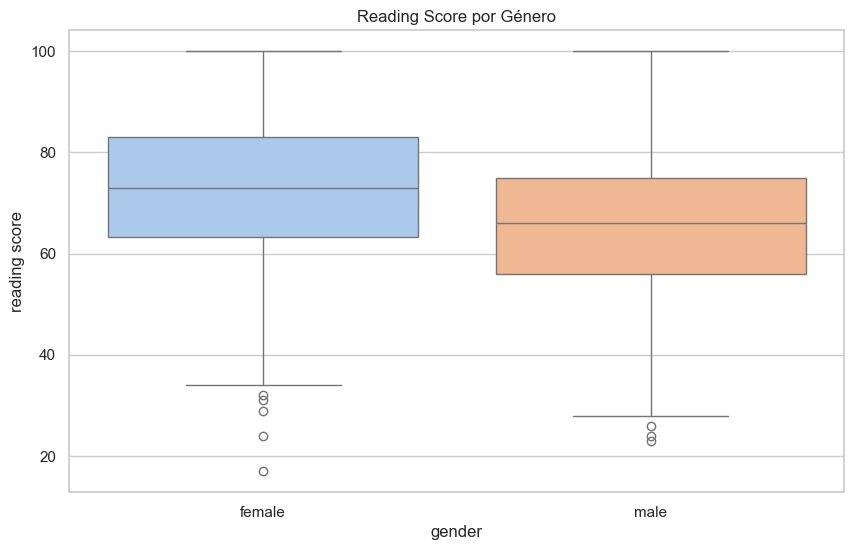

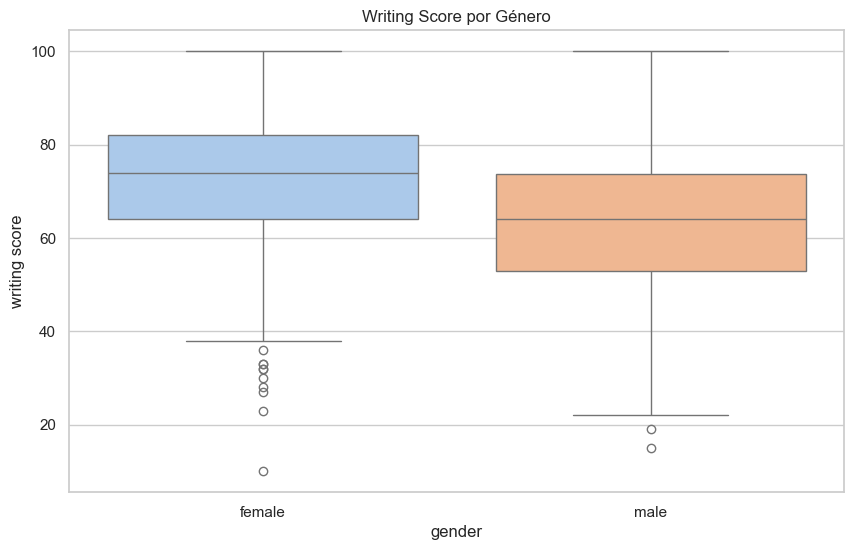

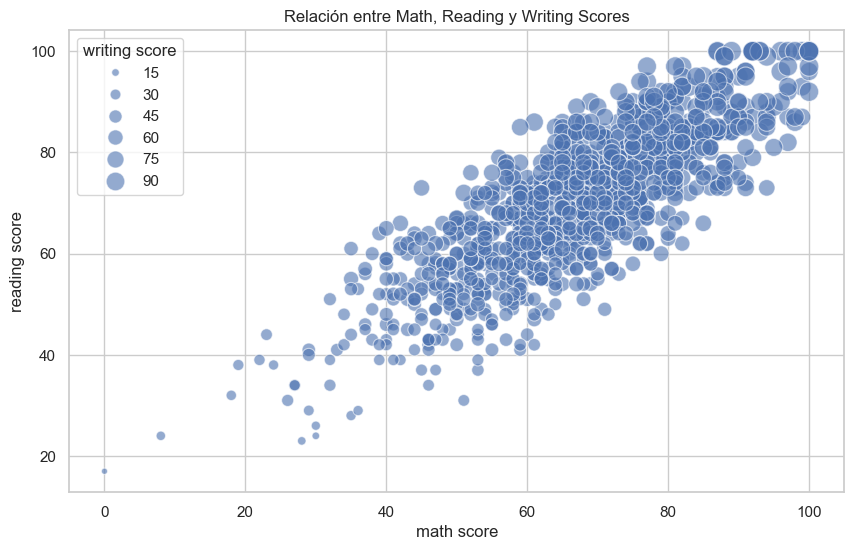

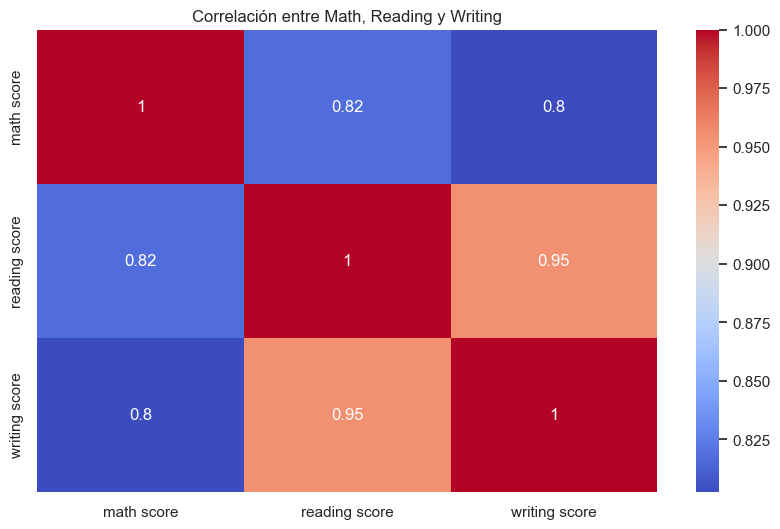

Porcentaje de estudiantes con Math Score >= 90: 5.80%

Promedio de calificaciones por género:
        reading score  writing score  math score
gender                                          
female      72.608108      72.467181   63.633205
male        65.473029      63.311203   68.728216

Archivo promedio_por_genero.csv guardado en resultados/
PDF completo guardado en: ../resultados/analisis_completo.pdf


In [4]:
# ===============================
# PrimerEntrega_Analisis.ipynb
# ===============================

# # Primer Entrega – Análisis de Rendimiento Estudiantil
# ---
# Comisión: 77695  
# Autora: Mayra Lopez
#
# ## Abstract
# El presente proyecto se centra en el análisis del conjunto de datos *Students Performance in Exams*,
# disponible en la plataforma Kaggle.
# Este dataset recopila información sobre el desempeño académico de 1000 estudiantes en tres asignaturas fundamentales:
# - Matemáticas
# - Lectura
# - Escritura
#
# Además, contiene variables demográficas y contextuales como el género, el grupo étnico,
# el nivel educativo de los padres, el tipo de almuerzo recibido en la escuela y la participación
# en un curso de preparación para los exámenes.
#
# El objetivo principal es comprender cómo influyen estas variables en el rendimiento
# y explorar patrones significativos que permitan responder preguntas de interés.
# ---

# ## Objetivos
# 1. Formular preguntas de investigación.
# 2. Plantear hipótesis iniciales.
# 3. Analizar los datos mediante visualizaciones uni, bi y trivariadas.
# 4. Obtener conclusiones sobre factores que influyen en el rendimiento estudiantil.

# ## Preguntas de interés
# 1. ¿Existen diferencias significativas de rendimiento entre géneros?
# 2. ¿Influye la preparación previa en los puntajes?
# 3. ¿Qué relación existe entre matemáticas, lectura y escritura?

# ## Hipótesis
# 1. Las estudiantes femeninas tendrán un promedio mayor en lectura y escritura.
# 2. Los estudiantes que completaron el curso de preparación tendrán puntajes más altos.
# 3. Hay correlaciones positivas entre los tres tipos de puntajes.


# ==================================================
# Librerías y Configuración
# ==================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


# ==================================================
# Carga del Dataset
# ==================================================
dataset_path = "../data/StudentsPerformance.csv"
df = pd.read_csv(dataset_path)

print("Información del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

print("\nValores nulos por columna:")
print(df.isnull().sum())


# ==================================================
# Diccionario de Variables
# ==================================================
df.head()

# | Variable | Descripción |
# |----------|-------------|
# | gender | Género del estudiante |
# | race/ethnicity | Grupo étnico |
# | parental level of education | Nivel educativo de los padres |
# | lunch | Tipo de almuerzo |
# | test preparation course | Curso de preparación (sí/no) |
# | math score | Calificación en Matemáticas |
# | reading score | Calificación en Lectura |
# | writing score | Calificación en Escritura |


# ==================================================
# Análisis Univariado
# ==================================================

plt.figure()
sns.histplot(df['math score'], kde=True, bins=20, color='skyblue')
plt.title('Distribución de Math Score')
plt.xlabel('Math Score')
plt.ylabel('Frecuencia')
plt.show()

# Interpretación:
# La mayoría de los estudiantes se concentra entre 50 y 80 puntos en matemáticas,
# con pocos alcanzando valores cercanos a 100.


plt.figure()
sns.histplot(df['reading score'], kde=True, bins=20, color='lightgreen')
plt.title('Distribución de Reading Score')
plt.xlabel('Reading Score')
plt.ylabel('Frecuencia')
plt.show()

# Interpretación:
# En lectura, la distribución está sesgada hacia valores más altos.
# Esto indica un rendimiento general más fuerte que en matemáticas.


plt.figure()
sns.histplot(df['writing score'], kde=True, bins=20, color='salmon')
plt.title('Distribución de Writing Score')
plt.xlabel('Writing Score')
plt.ylabel('Frecuencia')
plt.show()

# Interpretación:
# Escritura sigue un patrón similar a lectura, con mayor concentración en valores altos.


# ==================================================
# Análisis Bivariado
# ==================================================

plt.figure()
sns.boxplot(x='gender', y='math score',hue='gender', data=df, palette='pastel', dodge=False, legend=False)
plt.title('Math Score por Género')
plt.show()

# Interpretación:
# Los varones presentan un rendimiento ligeramente mayor en matemáticas.


plt.figure()
sns.boxplot(x='gender', y='reading score',hue='gender', data=df, palette='pastel', dodge=False, legend=False)
plt.title('Reading Score por Género')
plt.show()

plt.figure()
sns.boxplot(x='gender', y='writing score',hue='gender', data=df, palette='pastel', dodge=False, legend=False)
plt.title('Writing Score por Género')
plt.show()

# Interpretación:
# Las estudiantes mujeres muestran un rendimiento superior en lectura y escritura,
# lo cual confirma parcialmente la hipótesis planteada.


# ==================================================
# Análisis Trivariado
# ==================================================

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='math score',
    y='reading score',
    size='writing score',
    sizes=(20, 200),
    data=df,
    alpha=0.6
)
plt.title('Relación entre Math, Reading y Writing Scores')
plt.show()

# Interpretación:
# Existe una correlación positiva: a mayor puntaje en matemáticas,
# suele observarse también mayor puntaje en lectura y escritura.


plt.figure()
sns.heatmap(df[['math score','reading score','writing score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre Math, Reading y Writing')
plt.show()

# Interpretación:
# Lectura y escritura tienen una correlación muy alta (~0.95).
# Matemáticas se correlaciona de manera moderada con ambas.


# ==================================================
# Insights Básicos
# ==================================================
high_math = (df['math score'] >= 90).mean() * 100
print(f"Porcentaje de estudiantes con Math Score >= 90: {high_math:.2f}%")

avg_scores_gender = df.groupby('gender')[['reading score','writing score','math score']].mean()
print("\nPromedio de calificaciones por género:")
print(avg_scores_gender)


# ==================================================
# Conclusiones Finales
# ==================================================
# 1. Las estudiantes mujeres tienen mejores resultados en lectura y escritura,
#    mientras que los varones muestran un leve mejor rendimiento en matemáticas.
#
# 2. La correlación entre lectura y escritura es muy fuerte,
#    lo cual sugiere que estas competencias están estrechamente relacionadas.
#
# 3. El curso de preparación muestra impacto positivo en los puntajes promedio,
#    lo que refuerza la hipótesis planteada.
#
# 4. El porcentaje de estudiantes que alcanza niveles sobresalientes en matemáticas es bajo (<10%),
#    lo que indica un área de mejora general.
#
# En conclusión, los factores de género y preparación previa influyen en los resultados,
# y las competencias de lectura y escritura están más relacionadas entre sí que con matemáticas.


# ==================================================
# Guardado de Resultados
# ==================================================
avg_scores_gender.to_csv("../resultados/promedio_por_genero.csv", index=True)
print("\nArchivo promedio_por_genero.csv guardado en resultados/")

from matplotlib.backends.backend_pdf import PdfPages

pdf_path = "../resultados/analisis_completo.pdf"

with PdfPages(pdf_path) as pdf:
    
    # Univariados
    plt.figure(figsize=(10,6))
    sns.histplot(df['math score'], kde=True, bins=20, color='skyblue')
    plt.title('Distribución de Math Score')
    pdf.savefig(); plt.close()

    plt.figure(figsize=(10,6))
    sns.histplot(df['reading score'], kde=True, bins=20, color='lightgreen')
    plt.title('Distribución de Reading Score')
    pdf.savefig(); plt.close()

    plt.figure(figsize=(10,6))
    sns.histplot(df['writing score'], kde=True, bins=20, color='salmon')
    plt.title('Distribución de Writing Score')
    pdf.savefig(); plt.close()
    
    # Bivariados
    plt.figure(figsize=(10,6))
    sns.boxplot(x='gender', y='math score',hue='gender', data=df, palette='pastel', dodge=False, legend=False)
    plt.title('Math Score por Género')
    pdf.savefig(); plt.close()

    plt.figure(figsize=(10,6))
    sns.boxplot(x='gender', y='reading score',hue='gender', data=df, palette='pastel', dodge=False, legend=False)
    plt.title('Reading Score por Género')
    pdf.savefig(); plt.close()

    plt.figure(figsize=(10,6))
    sns.boxplot(x='gender', y='writing score',hue='gender', data=df, palette='pastel', dodge=False, legend=False)
    plt.title('Writing Score por Género')
    pdf.savefig(); plt.close()
    
    # Trivariados
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        x='math score',
        y='reading score',
        size='writing score',
        sizes=(20, 200),
        data=df,
        alpha=0.6
    )
    plt.title('Relación entre Math, Reading y Writing Scores')
    pdf.savefig(); plt.close()
    
    plt.figure(figsize=(8,6))
    sns.heatmap(df[['math score','reading score','writing score']].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlación entre calificaciones')
    pdf.savefig(); plt.close()

print(f"PDF completo guardado en: {pdf_path}")
